In [1]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.special import genlaguerre as L

D:\Mark\Python\lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [22]:
hbar = 1.0#sp.constants.hbar

def Omega(n,m,eta):
    return np.abs(np.exp(-eta**2/2.0) * eta**(np.abs(m)) * (math.factorial(n)/math.factorial(n+m))**(np.sign(m)/2.0) \
        * L(n,np.abs(m))(eta**2))             #returns unitless rabi rate of transition n -> n+m given Lamb-Dicke Parameter

eta = 0.1
omegas = np.zeros(500)
for ii in range(np.size(omegas)):
    omegas[ii] = Omega(ii,0,eta)

D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:651: RuntimeWarning: invalid value encountered in double_scalars
  hn = _gam(n + alpha + 1) / _gam(n + 1)
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:196: RuntimeWarning: overflow encountered in true_divide
  w = 1.0 / (fm * dy)
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:202: RuntimeWarning: invalid value encountered in multiply
  w *= mu0 / w.sum()
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:127: RuntimeWarning: invalid value encountered in double_scalars
  equiv_weights = [weights[k] / wfunc(roots[k]) for
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:196: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / (fm * dy)
D:\Mark\Python\lib\site-packages\scipy\special\_or

In [23]:
OmegaObj = Qobj(np.diag(omegas))

In [33]:
Ncut = 300
nbar0 = 0
delta = 0.0
omegaVib = 2.0*np.pi*1.0e6
Omega = 2.0*np.pi*10.0

a = tensor(qeye(2), destroy(Ncut))
sm = tensor(destroy(2), qeye(Ncut))

H0 = -hbar*delta*sm*sm.dag() + hbar*omegaVib*(a.dag()*a + 0.5)
V = hbar*Omega*(sm + sm.dag())

K = 1.0e-4
Nbar = 1e7

c1 = np.sqrt(K*(Nbar+1.0))*a
c2 = np.sqrt(K*(Nbar))*a.dag()

liouv = liouvillian(H0-V, [c1,c2])

rho0 = tensor(fock_dm(2,0), thermal_dm(Ncut, 0))
expect(tensor(qeye(2),num(Ncut)), rho0)
expect(a.dag()*a, rho0)

0.0

In [35]:
times = np.linspace(0.0, 0.2, 200)

N = to_super(a*a.dag())
rhoee = to_super(sm*sm.dag())

result = mesolve(liouv, rho0, times, [], [a.dag()*a, sm.dag()*sm], options=Options(nsteps=10000))
#result = mesolve(liouv, rho0, times, [], [N, rhoee])

KeyboardInterrupt: 

IndexError: list index out of range

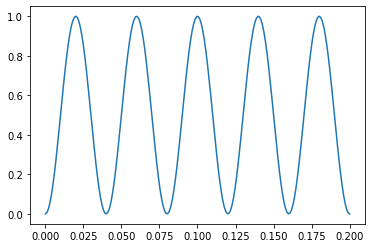

In [31]:
plt.plot(times, result.expect[0], label="N")
plt.plot(times, result.expect[1], label="rhoee")
plt.legend()
plt.show()

In [99]:
Ncut = 10
nbar0 = 0
delta = 0.0
omegaVib = 2.0*np.pi*1.0e6
Omega = 2.0*np.pi*10.0

a = tensor(qeye(2), destroy(Ncut))
sm = tensor(destroy(2), qeye(Ncut))
aDag = a.dag()
smDag = sm.dag()

N = a*aDag
N = to_super(N)

rhoee = sm*smDag
rhoee = to_super(rhoee)

#a = to_super(a)
#aDag = to_super(aDag)
sm = to_super(sm)
smDag = to_super(smDag)

#H0 = -hbar*delta*sm*sm.dag() + hbar*omegaVib*(a*a.dag() + 0.5)
#V = hbar*Omega*(sm + sm.dag())

H0 = -hbar*delta*rhoee + hbar*omegaVib*(N + 0.5)
V = hbar*Omega*(sm + smDag)

psi0 = tensor(fock_dm(2,1), thermal_dm(Ncut, nbar0))

In [100]:
times = np.linspace(0.0, np.pi/Omega, 200)
#result = mesolve(H0+V, psi0, times, [], [sm*sm.dag(), a*a.dag()])
result = mesolve(H0+V, psi0, times, [], [tensor(destroy(2), qeye(Ncut))*tensor(destroy(2), qeye(Ncut)), a*aDag])

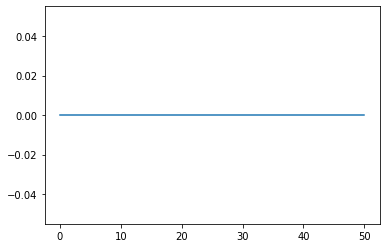

In [101]:
plt.plot(times*1e3, result.expect[0])
plt.show()

In [27]:
Omega = 2.0*np.pi*10.0
hbar = 1.0#sp.constants.hbar
delta = 0.0#Omega/2.0

H = -hbar*delta*destroy(2)*destroy(2).dag() + hbar*Omega*(destroy(2) + destroy(2).dag())
psi0 = fock(2,0)
times = np.linspace(0, 5.0*np.pi/Omega, 200)
result = sesolve(H,psi0,times,[destroy(2).dag()*destroy(2)])

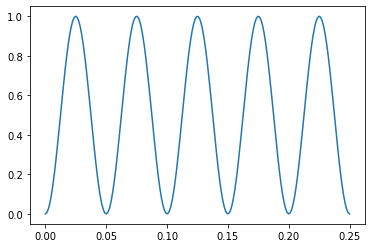

In [28]:
plt.plot(times, result.expect[0])

In [12]:
result

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0